Installing and Importing Libraries

In [ ]:
#Installing TensorFlow

!pip install tensorflow

In [ ]:
# Importing Libraries suitable for File handling & dataset access:

import os
import kagglehub

# Importing Libraries suitable for Deep Learning (TensorFlow / Keras):

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

# Importing Libraries suitable for Data Visualization:

import matplotlib.pyplot as plt
import seaborn as sns

# Importing Libraries suitable for Numerical & Scientific Computing:

import numpy as np

# Importing Libraries suitable for Model Performance Evaluation:

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


Importing the Dataset

In [ ]:
# Download dataset

path = kagglehub.dataset_download("nirmalsankalana/plantdoc-dataset")
print("Dataset root path:", path)
print("Contents:", os.listdir(path))

Using Colab cache for faster access to the 'plantdoc-dataset' dataset.
Dataset root path: /kaggle/input/plantdoc-dataset
Contents: ['folder_renamer.py', 'file_renamer.py', 'test', 'train']


In [ ]:
# A helper function finds the training directory:

def find_train_dir(root_path):
    """Search recursively for a 'train' folder inside root_path."""
    for dirpath, dirnames, filenames in os.walk(root_path):
        if "train" in dirnames:
            return os.path.join(dirpath, "train")
    return None

train_dir = find_train_dir(path)

if train_dir is None:
    raise FileNotFoundError("No 'train' folder found inside the dataset path. Check dataset structure!")

print("Using train_dir:", train_dir)

Using train_dir: /kaggle/input/plantdoc-dataset/train


In [ ]:
# Parameters

image_size = 224
batch_size = 32

Data Preprocessing & Augmentation

In [ ]:
# Train / Validation splits

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

# Data generators

train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=42
)

validation_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
    seed=42
)

print("Class Indices:", train_dataset.class_indices)

Found 2149 images belonging to 28 classes.
Found 521 images belonging to 28 classes.
Class Indices: {'Apple_Scab_Leaf': 0, 'Apple_leaf': 1, 'Apple_rust_leaf': 2, 'Bell_pepper_leaf': 3, 'Bell_pepper_leaf_spot': 4, 'Blueberry_leaf': 5, 'Cherry_leaf': 6, 'Corn_Gray_leaf_spot': 7, 'Corn_leaf_blight': 8, 'Corn_rust_leaf': 9, 'Peach_leaf': 10, 'Potato_leaf_early_blight': 11, 'Potato_leaf_late_blight': 12, 'Raspberry_leaf': 13, 'Soyabean_leaf': 14, 'Squash_Powdery_mildew_leaf': 15, 'Strawberry_leaf': 16, 'Tomato_Early_blight_leaf': 17, 'Tomato_Septoria_leaf_spot': 18, 'Tomato_leaf': 19, 'Tomato_leaf_bacterial_spot': 20, 'Tomato_leaf_late_blight': 21, 'Tomato_leaf_mosaic_virus': 22, 'Tomato_leaf_yellow_virus': 23, 'Tomato_mold_leaf': 24, 'Tomato_two_spotted_spider_mites_leaf': 25, 'grape_leaf': 26, 'grape_leaf_black_rot': 27}


Building the CNN

In [ ]:
# Model Architecture (Simple CNN)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(image_size,image_size,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_dataset.class_indices), activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Compiling, Training and Evaluation

> Model Compiling




In [ ]:
# Compiling

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,172,572 (42.62 MB)

 Trainable params: 11,172,572 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

> Model Training

In [ ]:
# Training Model

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset # Changed from val_dataset
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.0489 - loss: 3.9297 - val_accuracy: 0.0845 - val_loss: 3.2547
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.0720 - loss: 3.2596 - val_accuracy: 0.0864 - val_loss: 3.1985
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.0914 - loss: 3.2344 - val_accuracy: 0.1075 - val_loss: 3.1427
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.0890 - loss: 3.1925 - val_accuracy: 0.1324 - val_loss: 3.1322
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.1131 - loss: 3.1274 - val_accuracy: 0.0921 - val_loss: 3.0665
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.1452 - loss: 3.0433 - val_accuracy: 0.1420 - val_loss: 3.0206
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.1380 - loss: 2.9773 - val_accuracy: 0.1478 - val_loss: 2.9822
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.1376 - loss: 2.9958 - val_accuracy: 0.1612 - val_loss

> Model Evaluation

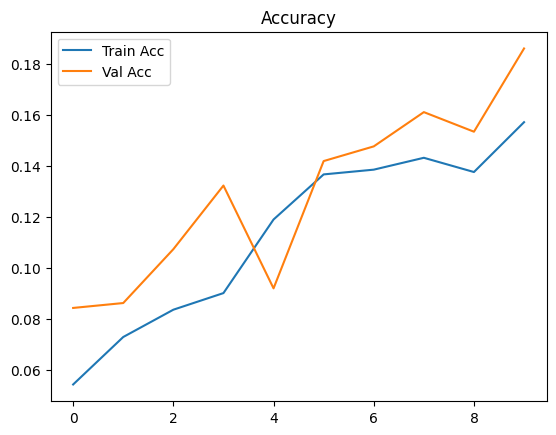

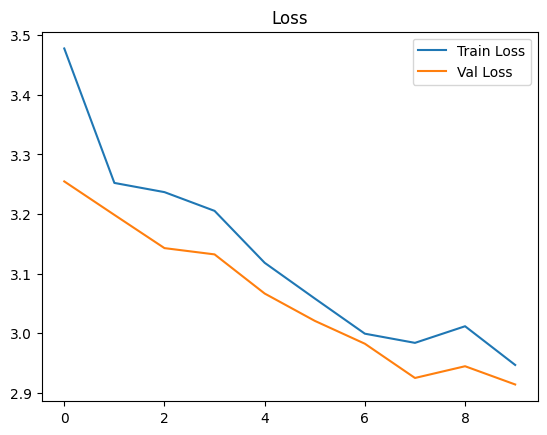

In [ ]:
# Plot Training & Validation Curves

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 981ms/step


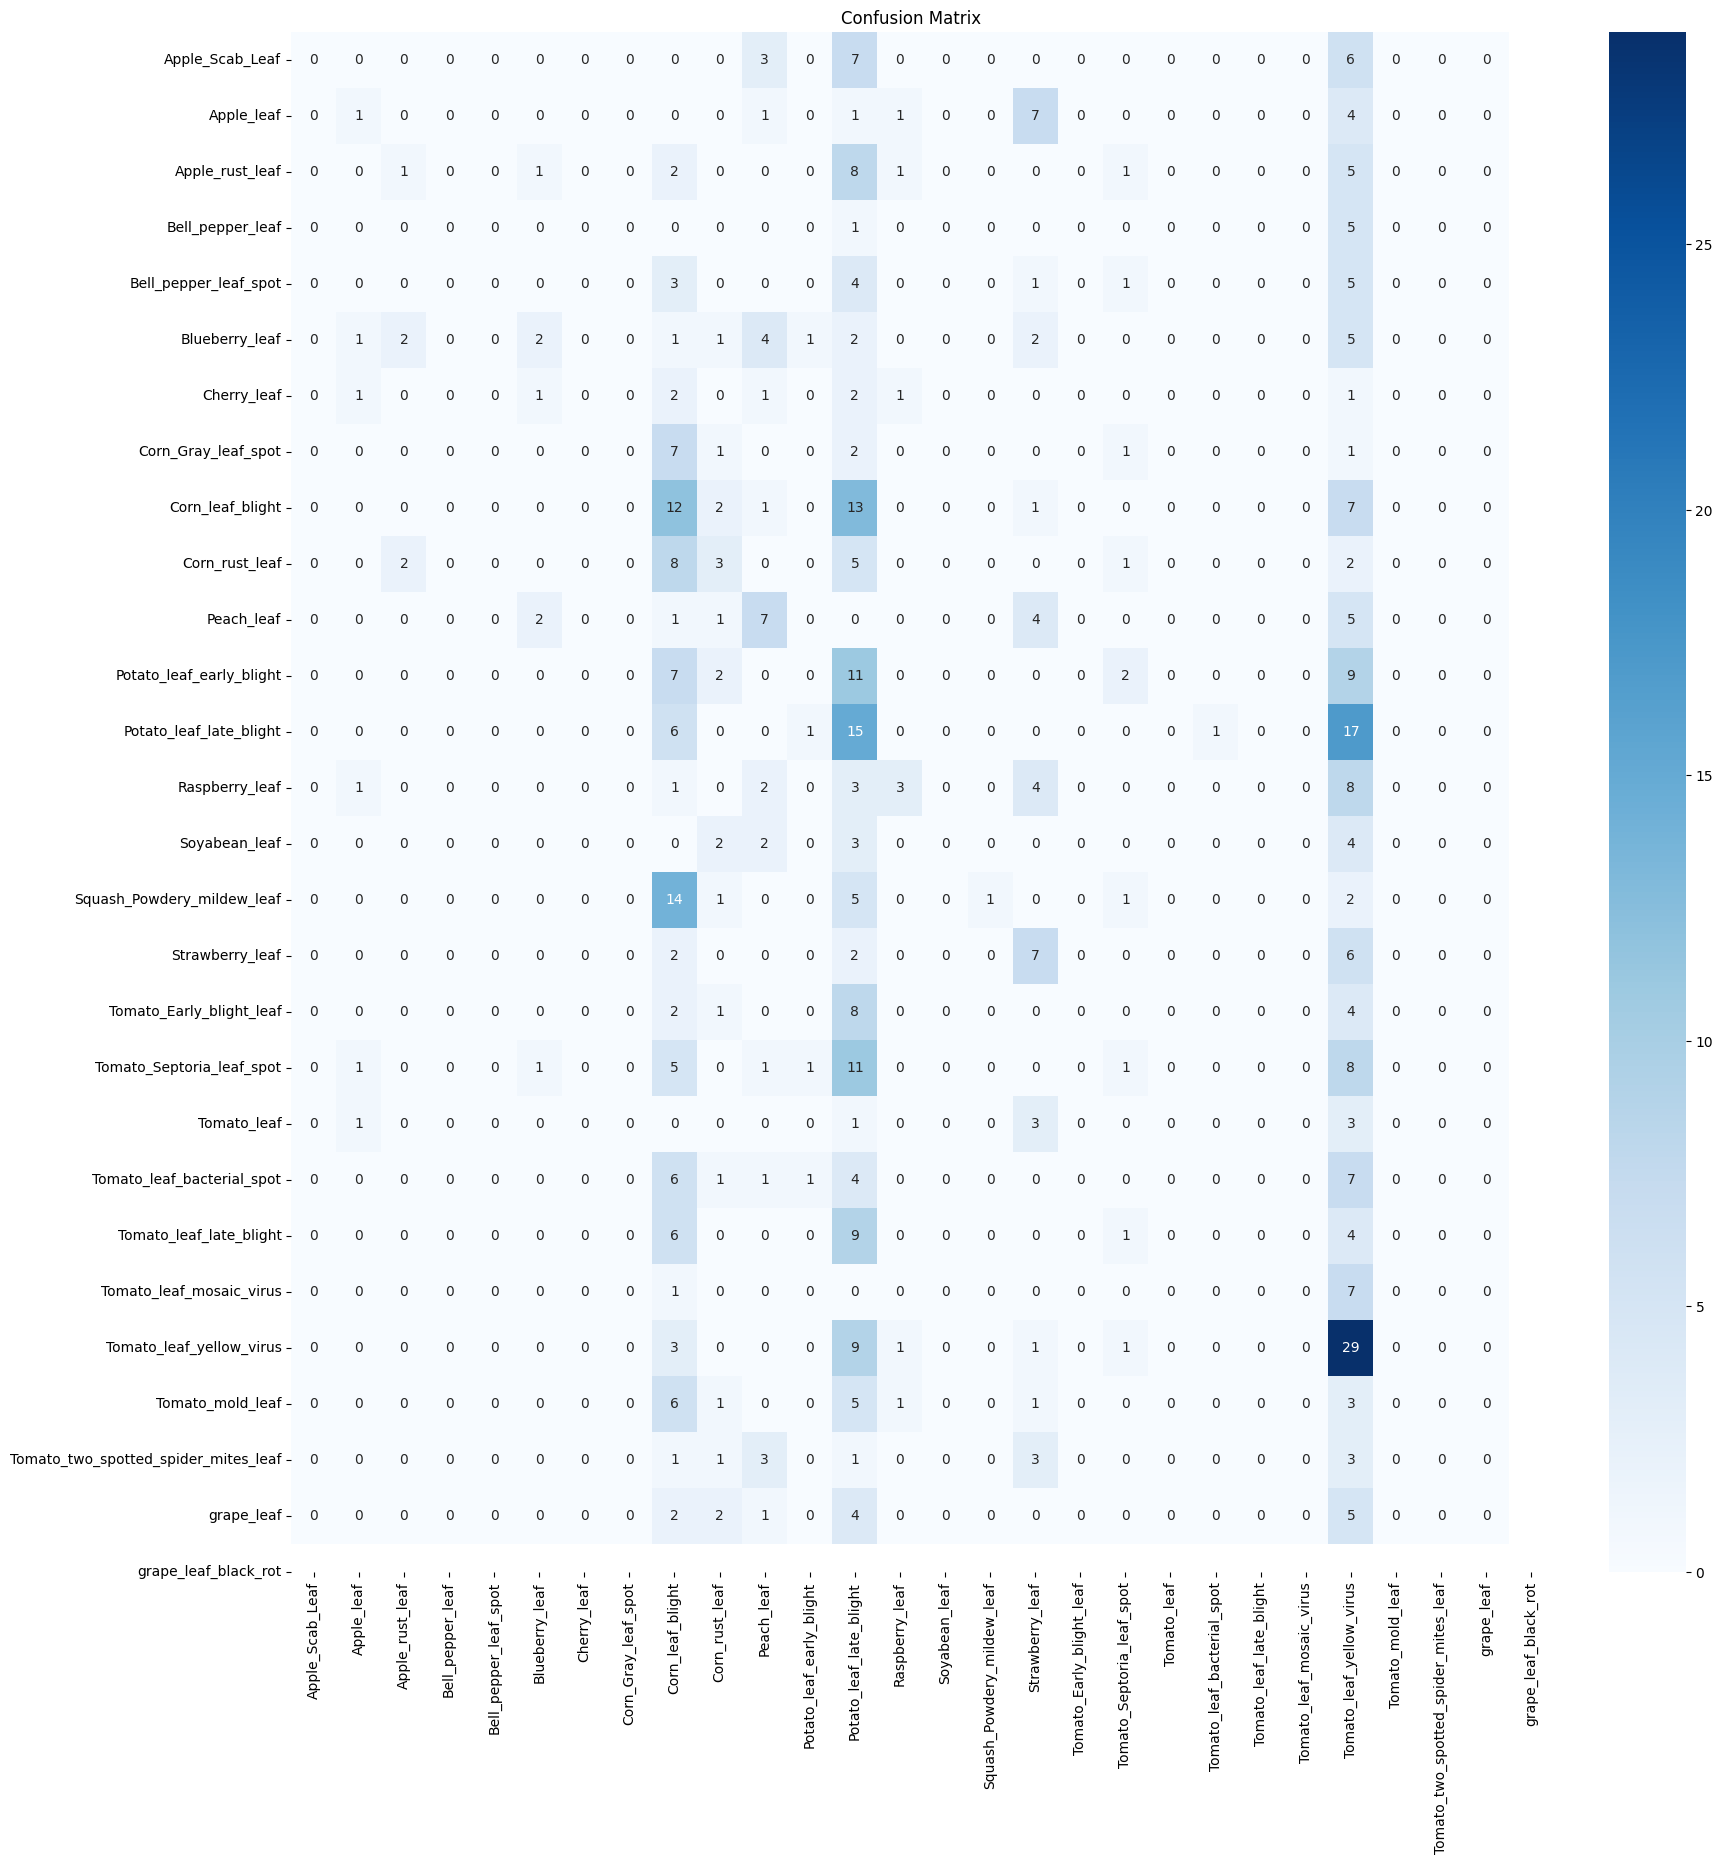

In [ ]:
# Model Evaluation

validation_dataset.reset()
pred_probs = model.predict(validation_dataset)
y_true = validation_dataset.classes
y_pred = np.argmax(pred_probs, axis=1)

# Confusion Matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=validation_dataset.class_indices.keys(),
            yticklabels=validation_dataset.class_indices.keys())
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report

labels = sorted(np.unique(y_true))  # actual classes present
target_names = [k for k,v in validation_dataset.class_indices.items() if v in labels]

print(classification_report(y_true, y_pred, labels=labels, target_names=target_names))

                            precision    recall  f1-score   support

           Apple_Scab_Leaf       0.00      0.00      0.00        16
                Apple_leaf       0.17      0.07      0.10        15
           Apple_rust_leaf       0.20      0.05      0.08        19
          Bell_pepper_leaf       0.00      0.00      0.00         6
     Bell_pepper_leaf_spot       0.00      0.00      0.00        14
            Blueberry_leaf       0.29      0.10      0.14        21
               Cherry_leaf       0.00      0.00      0.00         9
       Corn_Gray_leaf_spot       0.00      0.00      0.00        12
          Corn_leaf_blight       0.12      0.33      0.18        36
            Corn_rust_leaf       0.16      0.14      0.15        21
                Peach_leaf       0.26      0.35      0.30        20
  Potato_leaf_early_blight       0.00      0.00      0.00        31
   Potato_leaf_late_blight       0.11      0.38      0.17        40
            Raspberry_leaf       0.38      0.14

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# F1, Precision, Recall, ROC-AUC

f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
roc_auc = roc_auc_score(
    label_binarize(y_true, classes=list(range(len(train_dataset.class_indices)))),
    pred_probs,
    multi_class='ovr'
)

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

F1 Score: 0.1019
Precision: 0.1459
Recall: 0.1574
ROC-AUC: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


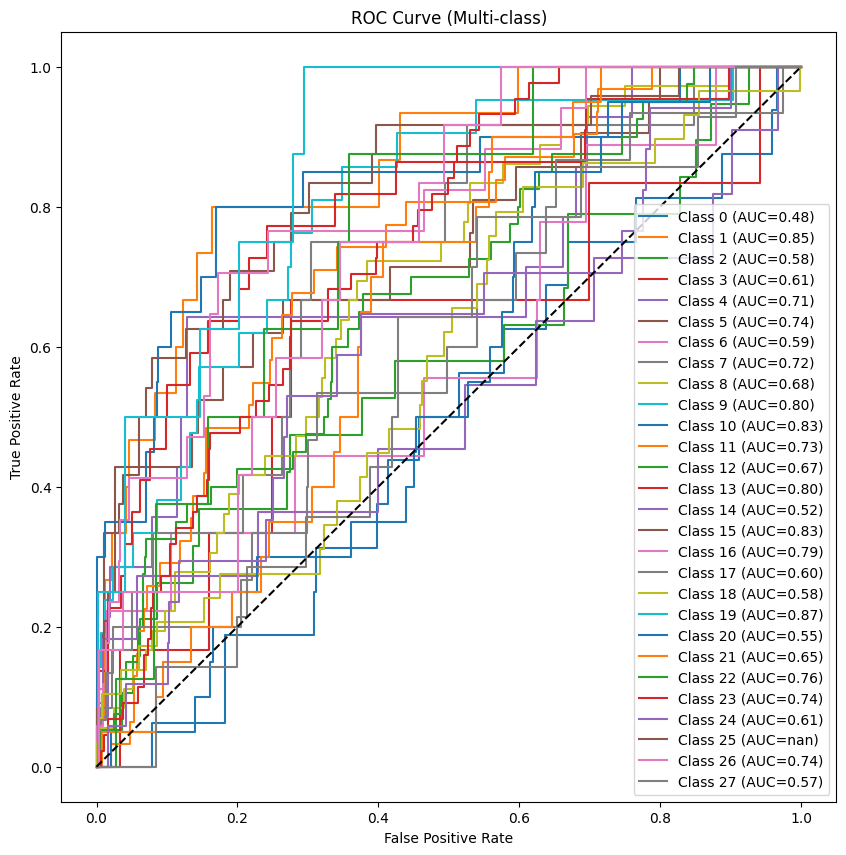

In [ ]:
# ROC Curve for Multi-class

n_classes = len(train_dataset.class_indices)
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10,10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC={roc_auc[i]:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve (Multi-class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()